<a href="https://colab.research.google.com/github/kearvin/Exercise-9-16/blob/main/Diabetes_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 15.15 — Linear Regression with the Diabetes Dataset (scikit-learn)

**Goal:** Recreate the same overall workflow from the Chapter 15.5 case study, but using the **Diabetes** dataset.

**What this notebook does:**
1. Load the Diabetes dataset from `sklearn.datasets`
2. Explore the data (shape, feature names, basic stats)
3. Visualize relationships and the target distribution
4. Build a baseline Linear Regression model
5. Evaluate with train/test split + metrics
6. Try a few model-selection ideas (Ridge/Lasso, Polynomial features) and compare results

> **Tip:** Rewrite the markdown explanations in your own words before submitting.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)


## 1) Load the Diabetes dataset
The Diabetes dataset has 10 baseline variables (features) and a quantitative target (disease progression one year after baseline).


In [ ]:
diabetes = load_diabetes(as_frame=True)

X = diabetes.data      # DataFrame
y = diabetes.target    # Series

print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()


X shape: (442, 10)
y shape: (442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# Feature names
diabetes.feature_names


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## 2) Quick data checks


In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
# Missing values (should be none)
X.isna().sum()


,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [ ]:
# Basic stats for features and target
display(X.describe())
display(y.describe())


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


,target
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


## 3) Visualizations
We'll look at:
- Histogram of the target
- A few scatter plots of features vs target


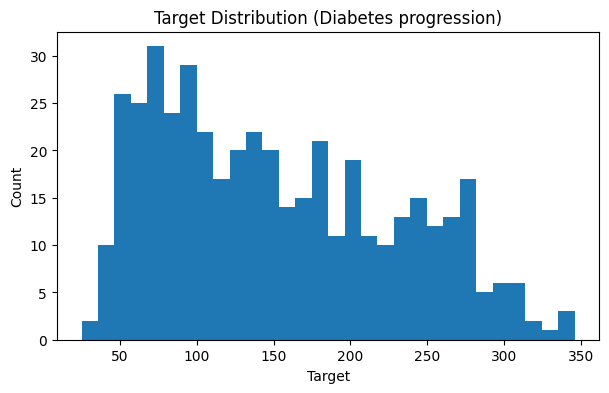

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(y, bins=30)
plt.title("Target Distribution (Diabetes progression)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


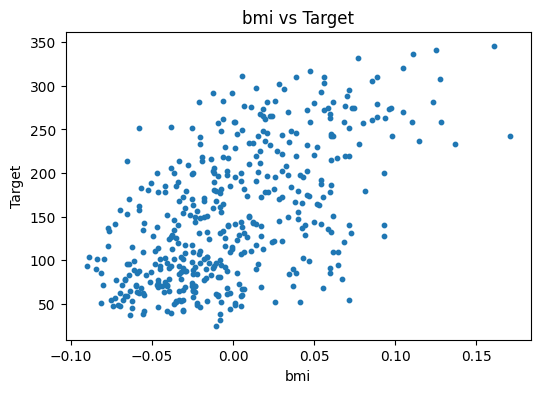

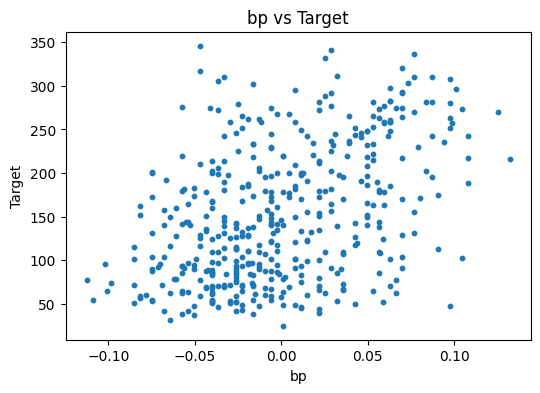

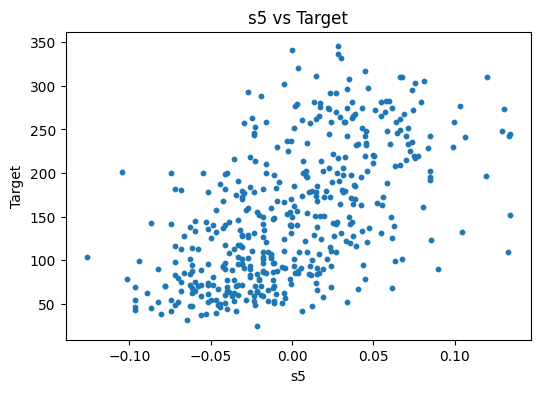

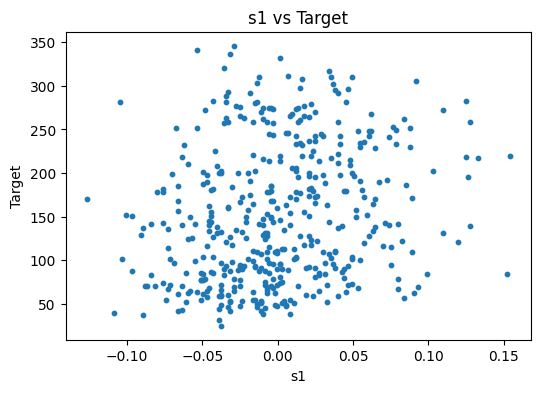

In [ ]:
# Pick a few features to visualize vs target
features_to_plot = ["bmi", "bp", "s5", "s1"]

for f in features_to_plot:
    plt.figure(figsize=(6,4))
    plt.scatter(X[f], y, s=10)
    plt.title(f"{f} vs Target")
    plt.xlabel(f)
    plt.ylabel("Target")
    plt.show()


## 4) Train/Test split
We'll hold out a test set to evaluate generalization.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (353, 10) Test: (89, 10)


## 5) Baseline model: Linear Regression
We'll train a basic Linear Regression model and evaluate using:
- MAE
- MSE / RMSE
- R²


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance (Test Set)")
print("MAE :", round(mae, 3))
print("MSE :", round(mse, 3))
print("RMSE:", round(rmse, 3))
print("R^2 :", round(r2, 3))


Linear Regression Performance (Test Set)
MAE : 42.794
MSE : 2900.194
RMSE: 53.853
R^2 : 0.453


### Predicted vs Actual plot
If the model is good, points should fall close to a diagonal line.


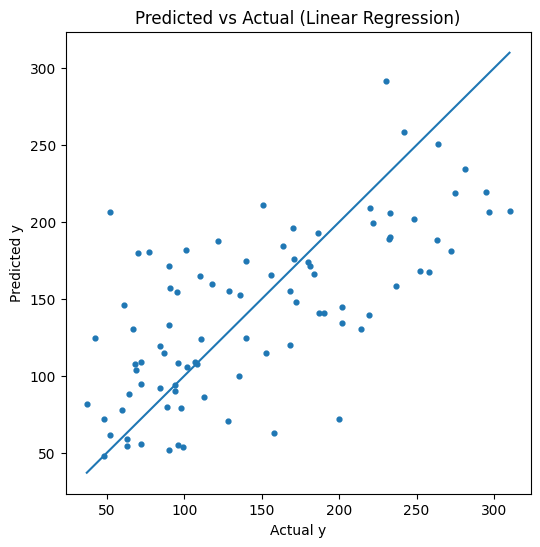

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=12)
plt.title("Predicted vs Actual (Linear Regression)")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")

min_y = min(y_test.min(), y_pred.min())
max_y = max(y_test.max(), y_pred.max())
plt.plot([min_y, max_y], [min_y, max_y])
plt.show()


## 6) Model selection ideas (like the case study style)

### A) Ridge Regression (L2 regularization)
We use a Pipeline with StandardScaler because regularization is scale-sensitive.


In [ ]:
ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0, random_state=42))
])

ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression Performance (Test Set)")
print("MAE :", round(ridge_mae, 3))
print("RMSE:", round(ridge_rmse, 3))
print("R^2 :", round(ridge_r2, 3))


Ridge Regression Performance (Test Set)
MAE : 42.812
RMSE: 53.777
R^2 : 0.454


### B) Lasso Regression (L1 regularization)
Lasso can shrink some coefficients to zero (feature selection-ish behavior).


In [ ]:
lasso_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.05, max_iter=10000, random_state=42))
])

lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Lasso Regression Performance (Test Set)")
print("MAE :", round(lasso_mae, 3))
print("RMSE:", round(lasso_rmse, 3))
print("R^2 :", round(lasso_r2, 3))


Lasso Regression Performance (Test Set)
MAE : 42.8
RMSE: 53.774
R^2 : 0.454


### C) Polynomial features + Linear Regression
This can capture non-linear relationships, but it can also overfit.
We'll try degree=2 as a basic experiment.


In [ ]:
poly2_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

poly2_model.fit(X_train, y_train)
poly2_pred = poly2_model.predict(X_test)

poly2_mse = mean_squared_error(y_test, poly2_pred)
poly2_rmse = np.sqrt(poly2_mse)
poly2_mae = mean_absolute_error(y_test, poly2_pred)
poly2_r2 = r2_score(y_test, poly2_pred)

print("Polynomial (degree=2) + Linear Regression Performance (Test Set)")
print("MAE :", round(poly2_mae, 3))
print("RMSE:", round(poly2_rmse, 3))
print("R^2 :", round(poly2_r2, 3))


Polynomial (degree=2) + Linear Regression Performance (Test Set)
MAE : 43.582
RMSE: 55.642
R^2 : 0.416


## 7) Compare models (summary table)


In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge (alpha=1.0)", "Lasso (alpha=0.05)", "Poly2 + Linear"],
    "MAE":  [mae, ridge_mae, lasso_mae, poly2_mae],
    "RMSE": [rmse, ridge_rmse, lasso_rmse, poly2_rmse],
    "R2":   [r2, ridge_r2, lasso_r2, poly2_r2]
}).sort_values("RMSE")

results


,Model,MAE,RMSE,R2
2,Lasso (alpha=0.05),42.799562,53.774196,0.454213
1,Ridge (alpha=1.0),42.811999,53.777454,0.454147
0,Linear Regression,42.794095,53.853446,0.452603
3,Poly2 + Linear,43.581693,55.641965,0.415640


## 8) Cross-validation (optional but good practice)
To avoid relying on a single train/test split, we can compare models using cross-validation.
We’ll use **R²** as the scoring metric here.


In [ ]:
def cv_r2(model, X, y, folds=5):
    scores = cross_val_score(model, X, y, cv=folds, scoring="r2")
    return scores.mean(), scores.std()

models = {
    "Linear Regression": LinearRegression(),
    "Ridge (alpha=1.0)": ridge_model,
    "Lasso (alpha=0.05)": lasso_model,
    "Poly2 + Linear": poly2_model
}

cv_rows = []
for name, model in models.items():
    mean_r2, std_r2 = cv_r2(model, X, y, folds=5)
    cv_rows.append((name, mean_r2, std_r2))

cv_df = pd.DataFrame(cv_rows, columns=["Model", "CV Mean R2", "CV Std R2"]).sort_values("CV Mean R2", ascending=False)
cv_df


,Model,CV Mean R2,CV Std R2
2,Lasso (alpha=0.05),0.482477,0.048732
0,Linear Regression,0.482316,0.049269
1,Ridge (alpha=1.0),0.482194,0.048859
3,Poly2 + Linear,0.391502,0.120519


## 9) Conclusion (rewrite in your own words)

In this project, I utilized the Diabetes dataset from scikit-learn to explore developing and testing regression models. I analyzed the performance of a basic Linear Regression model using common evaluation metrics such as MAE, RMSE, and R². I then experimented with several model selection strategies, including Ridge regression, Lasso regression, and polynomial features, to determine how regularization and nonlinearity affected performance. Finally, cross-validation was employed to improve model reliability. This exercise helps underline the application of linear regression and model evaluation to real-world datasets.